In [144]:
#TODO make class for returning process of Stock Price.
#TODO write code for deriving call option price in the balck-sholes model.

# 12/13
## Progress

Make GetProcess_Black
- asset is assumed as stock
- Inputs are initial value(init), drift term(drift), maturity of a transaction (assuming option pricing), number of path(num_of_path)
- Outputs are given by the list of stockprice of each grid time.
- Grid time are determined by the number of path and maturity

Make DrawPath_Black
- This function is used for visializing the result of GetProcess_Black
- Input are the same as GetProcess_Black except simulation number(simnum)
- Simulation number corresponds to the number of path of one process

## TODO クラス化して，stockpricessを保持できるようなクラスを作りたい（ざっくりベース)
- .get_process()
- .drawpath()
- みたいなメソッドを作りたい

In [16]:
%matplotlib inline
import numpy as np
import random, math
import matplotlib.pyplot as plt

def GetProcess_Black(init, drift, volatility, maturity, num_of_path):
    delta_t = maturity / num_of_path
    stockprice = np.zeros(num_of_path)
    stockprice[0] = init
    for i in range(1, num_of_path):
        stockprice[i] = stockprice[i-1] * math.exp( (drift - ( volatility ** 2 / 2 ) ) * 
                                                   delta_t + volatility * math.sqrt(delta_t) * random.gauss(0,1) )
    return list(stockprice)

GetProcess_Black(100, 0.1, 0.5, 5, 10000)
#plt.plot(GetProcess_Black(100, 0.1, 0.5, 5, 100000))

[100.0,
 98.597383680980911,
 99.028337244410409,
 100.63388411773327,
 100.83894414893501,
 99.235792798633327,
 97.018929543529978,
 97.232570982140288,
 97.989932893300264,
 100.00732818656741,
 98.766205468097198,
 96.878264886735877,
 96.869814370840743,
 97.377199537295226,
 95.469098431677509,
 94.388634989146297,
 95.343051131863774,
 94.996704007203149,
 95.001362241714247,
 95.929591425440918,
 96.106954963468411,
 93.820215259087831,
 94.1149529028432,
 95.296645652144917,
 95.60540653631638,
 95.767203067385253,
 95.556391450327212,
 95.639444186994595,
 94.220796993833105,
 94.85937631902965,
 94.897954125096206,
 93.952504244407095,
 94.748529143242763,
 96.407145302155428,
 97.658148787668949,
 98.979812266154681,
 98.579969743024108,
 99.608238558600277,
 99.117558945605609,
 97.98560430192336,
 97.981395216361548,
 97.681685876398021,
 97.649545758957402,
 96.56470112073076,
 94.537743222279616,
 95.215502663612924,
 93.792674353596439,
 93.806243936753489,
 94.5533625

In [5]:
def DrawPath_Black(init, drift, volatility, maturity, num_of_path, simnum):
    #make list of list. If a dimentsion would be added, the same logic would be applicable.
    StockProcess = np.zeros(simnum*num_of_path).reshape(simnum,num_of_path)
    for i in range(simnum):
        StockProcess[i] = list(GetProcess_Black(init, drift, volatility, 
                                                maturity, num_of_path))
    for i in range(simnum):
        plt.plot(StockProcess[i])

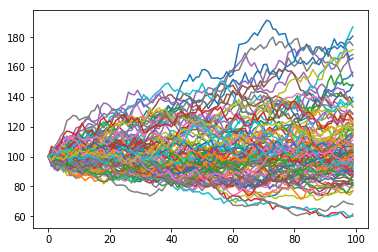

In [57]:
DrawPath_Black(100, 0.01, 0.1, 5, 100, 100)

In [139]:
class BlackSholes:
    def __init__(self, initial, drift, volatility, maturity, num_of_path, simnum):
        self.initial = initial
        self.drift = drift
        self.volatility = volatility
        self.maturity = maturity
        self.num_of_path = num_of_path
        self.simnum= simnum
    
    def GetProcess_Black(self):
        delta_t = self.maturity / self.num_of_path
        stockprice = np.zeros(self.num_of_path)
        stockprice[0] = self.initial
        for i in range(1, self.num_of_path):
            stockprice[i] = stockprice[i-1] * math.exp( (self.drift - ( self.volatility ** 2 / 2 ) ) * 
                                                       delta_t + self.volatility * math.sqrt(delta_t) * random.gauss(0,1) )
        return list(stockprice)
    
    def DrawPath_Black(self):
        #make list of list. If a dimentsion would be added, the same logic would be applicable.
        StockProcess = np.zeros(self.simnum*self.num_of_path).reshape(self.simnum, self.num_of_path)
        for i in range(self.simnum):
            StockProcess[i] = list(self.GetProcess_Black())
        for i in range(self.simnum):
            plt.plot(StockProcess[i])
            
    def Draw_Histgram(self, isCumulative):
        print('argument "1": cumulative distribution function , "0": probability density function')
        self.isCumulative = isCumulative
        StockPrice_at_maturity = np.zeros(self.simnum)
        for i in range(self.simnum):
            StockPrice_at_maturity[i] = self.GetProcess_Black()[-1]
        if self.isCumulative == 1:
            plt.hist(StockPrice_at_maturity, bins=100, cumulative=True)
        else:
            plt.hist(StockPrice_at_maturity, bins=100)
        
    def Call_Option(self, strike):
        self.strike = strike
        StockPrice_at_maturity = np.zeros(self.simnum)
        for i in range(self.simnum):
            StockPrice_at_maturity[i] = self.GetProcess_Black()[-1]
        price = math.exp(- self.drift * self.maturity ) *(StockPrice_at_maturity - self.strike).sum() / self.simnum
        return price

argument "1": cumulative distribution function , "0": probability density function


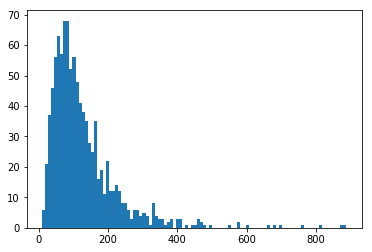

In [149]:
black1 = BlackSholes(100, 0.05, 0.3, 5, 500,1000)
black1.GetProcess_Black()
black1.Draw_Histgram(0)

In [146]:
black1 = BlackSholes(100, 0.01, 0.1, 5, 500,10000)
black1.Call_Option(95)

10.117353513914448